In [411]:
import tensorflow as tf
import random 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [412]:
#data Per-Processing

data = pd.read_csv('Proj1_Data.csv', index_col=0)
#data
#data.describe()
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [413]:
data.shape

(10000, 13)

In [414]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [415]:
data.drop(labels=['Surname', 'CustomerId'], axis=1, inplace=True)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [416]:
data.shape
data.info()

(10000, 11)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 937.5+ KB


In [417]:
#Encoding Categorical Data with One-Hot

categorical = data[['Geography', 'Gender']]
categorical = pd.get_dummies(categorical)
categorical.head()

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
RowNumber,,,,,
1,1,0,0,1,0
2,0,0,1,1,0
3,1,0,0,1,0
4,1,0,0,1,0
5,0,0,1,1,0


In [418]:
data.drop(labels=['Geography', 'Gender'], axis=1, inplace=True)
data = pd.concat([data, categorical], axis = 1)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
RowNumber,,,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
2,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
3,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
4,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
5,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [419]:
data.shape

(10000, 14)

In [420]:
data['Exited'].unique()

array([1, 0], dtype=int64)

In [421]:
features = data.drop(columns='Exited')
target = pd.DataFrame(data['Exited'])

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 13)
(2000, 13)
(8000, 1)
(2000, 1)


In [422]:
#Scaling X_train with StandardScaler

from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)
#print(X_train)

In [423]:
#Creating Network

from tensorflow.keras.layers import Dense , Dropout ,Input , Average
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import layers
from tensorflow.keras import initializers


In [432]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense # Passing a list of layers to the constructor

tf.random.set_seed(5)

input_layer = Input(shape = X_train.shape[1], name ="input")
hidden_layer1 = Dense(100 ,activation='relu' , name="layer1")(input_layer)
hidden_layer2 = Dense(10 ,activation='relu' , name="layer2")(hidden_layer1)
#hidden_layer3 = Dense(8 ,activation='sigmoid' , name="layer3")(hidden_layer2)
droupout_layer = Dropout(0.2)(hidden_layer2)
output_layer = Dense(2 ,activation='softmax' , name="layer3")(droupout_layer)

model = Model(inputs=input_layer, outputs=output_layer , name = "model1")
model.summary()

Model: "model1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 13)]              0         
_________________________________________________________________
layer1 (Dense)               (None, 100)               1400      
_________________________________________________________________
layer2 (Dense)               (None, 10)                1010      
_________________________________________________________________
dropout_26 (Dropout)         (None, 10)                0         
_________________________________________________________________
layer3 (Dense)               (None, 2)                 22        
Total params: 2,432
Trainable params: 2,432
Non-trainable params: 0
_________________________________________________________________


In [433]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import callbacks 


sgd = SGD(lr=0.001, momentum=0.95)

es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=2)
#adam= tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer= sgd, loss='binary_crossentropy',metrics=['accuracy'])


In [434]:
history = model.fit(X_train, y_train, batch_size=60 , epochs= 100, validation_split=0.33, callbacks=[es])

Epoch 1/100
90/90 [==============================] - 0s 3ms/step - loss: 0.7144 - accuracy: 0.4669 - val_loss: 0.6990 - val_accuracy: 0.5983
Epoch 2/100
90/90 [==============================] - 0s 2ms/step - loss: 0.6986 - accuracy: 0.5760 - val_loss: 0.6964 - val_accuracy: 0.5812
Epoch 3/100
90/90 [==============================] - 0s 2ms/step - loss: 0.6968 - accuracy: 0.5587 - val_loss: 0.6954 - val_accuracy: 0.5604
Epoch 4/100
90/90 [==============================] - 0s 2ms/step - loss: 0.6960 - accuracy: 0.5563 - val_loss: 0.6949 - val_accuracy: 0.5612
Epoch 5/100
90/90 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.5535 - val_loss: 0.6945 - val_accuracy: 0.5589
Epoch 6/100
90/90 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5477 - val_loss: 0.6943 - val_accuracy: 0.5577
Epoch 7/100
90/90 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.5557 - val_loss: 0.6941 - val_accuracy: 0.5543
Epoch 8/100
9

<Figure size 504x360 with 0 Axes>

Text(0.5, 1.0, 'model accuracy')

Text(0, 0.5, 'accuracy')

Text(0.5, 0, 'epoch')

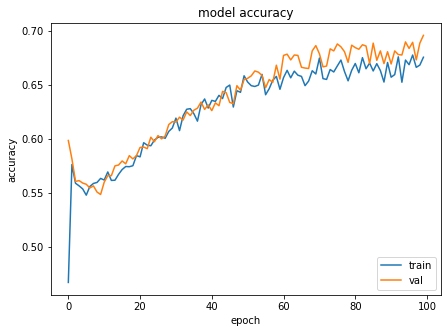

In [435]:
import matplotlib.pyplot as plt

plt.figure(figsize = (7,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

<Figure size 504x360 with 0 Axes>

Text(0.5, 1.0, 'model loss')

Text(0, 0.5, 'loss')

Text(0.5, 0, 'epoch')

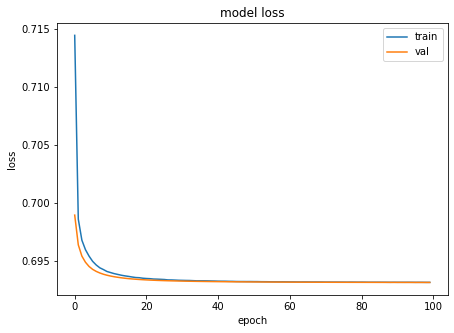

In [436]:
plt.figure(figsize = (7,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [437]:
y_pred = model.predict(X_test)
print(y_pred)
pred = np.argmax(y_pred, axis=1)
print(pred)

[[0.5002903  0.49970973]
 [0.50041795 0.4995821 ]
 [0.49521726 0.50478274]
 ...
 [0.5003285  0.49967152]
 [0.50041795 0.4995821 ]
 [0.50041795 0.4995821 ]]
[0 0 1 ... 0 0 0]


In [438]:
score = metrics.accuracy_score(y_test, pred)
round(score*100,2)

69.9

In [439]:
#model.save_weights('Network_best_weights.hdf5')

#model.load_weights('Network_best_weights.hdf5')